### **Maman 11 Q2**

Recording:

[link text](https://drive.google.com/file/d/1SKWT9jCpezXduAi01rzWXlG8xSnYHXXD/view?usp=sharing)

In [4]:
import torch

## **Part A**

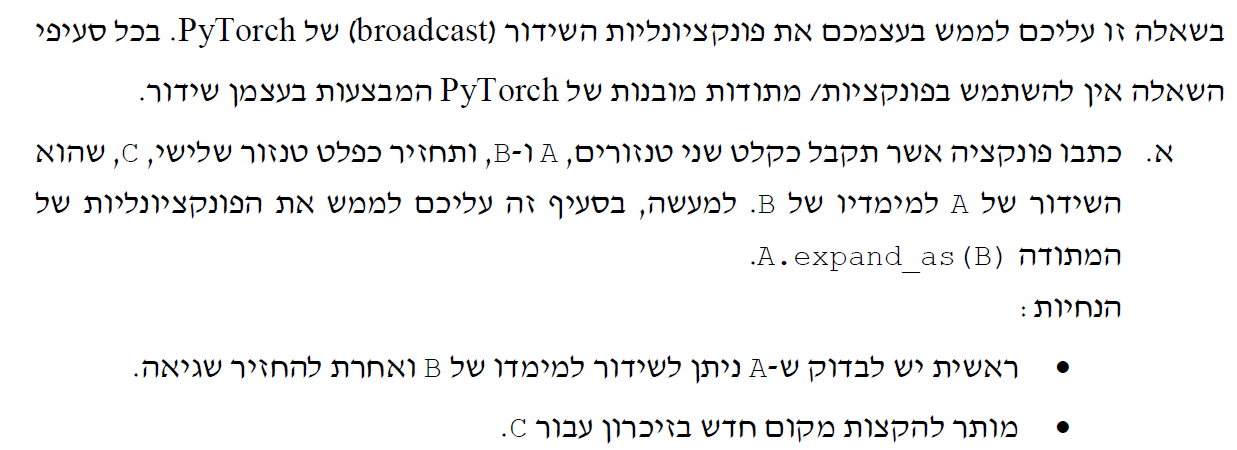

In [5]:
def check_shape_compatibility_for_expand(source_shape, target_shape):
  print("Source shape:", source_shape, "Target shape:", target_shape, sep=" ")

  target_dim = len(target_shape)
  source_dim = len(source_shape)
  if source_dim > target_dim:
      error = f"Could not expand. expand({source_shape}) to ({target_shape}) because the number of sizes provided ({target_dim}) must be greater or equal to the number of dimensions in the source tensor ({source_dim}) "
      return False, error
  if source_dim == 0 or target_dim == 0:
      error = f"could not expand - all dimensions must be > 0"
      return False, error

  for i, (s_dim, t_dim) in enumerate(zip(reversed(source_shape), reversed(target_shape))):
      dim_to_adjust = target_dim - i - 1
      if s_dim > t_dim:
          error = f"Could not expand. expand({source_shape}) to ({target_shape}) because the number of sizes provided ({t_dim}) must be greater or equal to the number of dimensions in the source tensor ({s_dim}) "
          return False, error
      if s_dim != t_dim and s_dim != 1:
          error = f"Could not expand - The expanded size of the tensor ({t_dim}) must match the existing size ({s_dim}) at non-singleton dimension 1.  Target sizes: {target_shape}.  Source sizes: {source_shape}"
          return False, error
  return True, "Shapes are Compatible for expand_as"


def my_expand_as(source, target):
  assert torch.is_tensor(source), f"my_expand_as supports only a tensor source!"
  assert torch.is_tensor(target), f"my_expand_as supports only a tensor target!"

  s_shape = source.detach().shape
  t_shape = target.detach().shape

  compatible, reason = check_shape_compatibility_for_expand(s_shape, t_shape)
  if not compatible:
      raise RuntimeError(reason)

  for i in range(target.ndim - source.ndim):
      source = torch.unsqueeze(source, 0)

  result = source.clone()
  s_shape = source.shape
  for i, (s_dim, t_dim) in enumerate(zip(reversed(s_shape), reversed(t_shape))):
      dim_to_adjust = target.ndim - i - 1
      # print(f"Dim #{dim_to_adjust}", "Current shape:", result.detach().shape, "Target shape:", t_shape, sep=" ")

      if s_dim < t_dim:
          result = torch.cat([result for _ in range(t_dim)], dim=dim_to_adjust)
          # print(f"Result shape after CAT {t_dim} times for dim #{dim_to_adjust}: {result.shape}")
      # print(f"Result shape for dim #{dim_to_adjust}: {result.shape}\n")
  return result


## **Test method and random inputs**



In [6]:
def test_expand_as(s, t):
    res_to_test = my_expand_as(s, t)
    res_expected = s.expand_as(t)
    print(f"\nExpected shape: {res_expected.shape}:", f"Expected Value:", res_expected, sep="\n")

    assert torch.all(res_expected.eq(res_to_test))
    print("\nExpanded tesults are equal")

In [7]:
t1 = torch.rand(3, 2, 1)
t2 = torch.rand(2, 1, 3, 2, 7)
t3 = torch.rand(2, 1)


# **Test VALID expand as**

In [8]:
res1 = t1.expand_as(t2)
res2 = my_expand_as(t1, t2)

print("Source:", t1, "Terget:", t2, "\nTorch expand as result: ", res1, res1.shape, "\nMy expand as result: ", res2, res2.shape, sep='\n')

Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([2, 1, 3, 2, 7])
Source:
tensor([[[0.1562],
         [0.7696]],

        [[0.8395],
         [0.1858]],

        [[0.7135],
         [0.7411]]])
Terget:
tensor([[[[[0.5611, 0.1039, 0.8420, 0.1468, 0.8557, 0.2499, 0.9847],
           [0.7328, 0.4694, 0.4185, 0.6057, 0.0099, 0.8705, 0.1499]],

          [[0.4194, 0.0079, 0.2958, 0.9800, 0.2057, 0.8560, 0.4367],
           [0.4376, 0.9348, 0.9872, 0.2439, 0.6253, 0.2242, 0.8134]],

          [[0.7898, 0.3198, 0.5183, 0.7630, 0.1653, 0.1221, 0.4000],
           [0.3022, 0.6861, 0.2142, 0.6279, 0.1891, 0.1696, 0.5222]]]],



        [[[[0.2858, 0.4384, 0.0901, 0.6748, 0.8478, 0.8337, 0.7186],
           [0.1385, 0.1536, 0.7179, 0.8950, 0.6739, 0.3485, 0.7251]],

          [[0.3677, 0.7884, 0.7862, 0.1409, 0.4499, 0.3080, 0.1425],
           [0.9106, 0.1872, 0.4706, 0.4834, 0.6245, 0.8391, 0.8204]],

          [[0.6970, 0.8610, 0.9441, 0.4981, 0.5597, 0.0027, 0.0903],
           [0

In [9]:
test_expand_as(t1, t2)

Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([2, 1, 3, 2, 7])

Expected shape: torch.Size([2, 1, 3, 2, 7]):
Expected Value:
tensor([[[[[0.1562, 0.1562, 0.1562, 0.1562, 0.1562, 0.1562, 0.1562],
           [0.7696, 0.7696, 0.7696, 0.7696, 0.7696, 0.7696, 0.7696]],

          [[0.8395, 0.8395, 0.8395, 0.8395, 0.8395, 0.8395, 0.8395],
           [0.1858, 0.1858, 0.1858, 0.1858, 0.1858, 0.1858, 0.1858]],

          [[0.7135, 0.7135, 0.7135, 0.7135, 0.7135, 0.7135, 0.7135],
           [0.7411, 0.7411, 0.7411, 0.7411, 0.7411, 0.7411, 0.7411]]]],



        [[[[0.1562, 0.1562, 0.1562, 0.1562, 0.1562, 0.1562, 0.1562],
           [0.7696, 0.7696, 0.7696, 0.7696, 0.7696, 0.7696, 0.7696]],

          [[0.8395, 0.8395, 0.8395, 0.8395, 0.8395, 0.8395, 0.8395],
           [0.1858, 0.1858, 0.1858, 0.1858, 0.1858, 0.1858, 0.1858]],

          [[0.7135, 0.7135, 0.7135, 0.7135, 0.7135, 0.7135, 0.7135],
           [0.7411, 0.7411, 0.7411, 0.7411, 0.7411, 0.7411, 0.7411]]]]])

Expanded tesu

In [10]:
print("Source:", t3, "Target:", t1, sep='\n')
test_expand_as(t3, t1)

Source:
tensor([[0.5555],
        [0.8824]])
Target:
tensor([[[0.1562],
         [0.7696]],

        [[0.8395],
         [0.1858]],

        [[0.7135],
         [0.7411]]])
Source shape: torch.Size([2, 1]) Target shape: torch.Size([3, 2, 1])

Expected shape: torch.Size([3, 2, 1]):
Expected Value:
tensor([[[0.5555],
         [0.8824]],

        [[0.5555],
         [0.8824]],

        [[0.5555],
         [0.8824]]])

Expanded tesults are equal


# **Test INVALID expand as**

## **1. Source dimension count is higher**



In [11]:
t2.expand_as(t1)

RuntimeError: ignored

In [12]:
my_expand_as(t2, t1)

Source shape: torch.Size([2, 1, 3, 2, 7]) Target shape: torch.Size([3, 2, 1])


RuntimeError: ignored

## **2. Parallel dimensions are not 1 nor equal**

In [13]:
# already defined - t1 = torch.rand(3, 2, 1)
t4 = torch.rand(3, 5, 1)

In [14]:
t1.expand_as(t4)

RuntimeError: ignored

In [15]:
my_expand_as(t1, t4)

Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([3, 5, 1])


RuntimeError: ignored

# **3. The source tensor has a non singular dimension > the respective dimension in the target tensor**

In [16]:
# already defined - t1 = torch.rand(3, 2, 1)
# already defined - t4 = torch.rand(3, 5, 1)

In [17]:
t4.expand_as(t1)

RuntimeError: ignored

In [18]:
my_expand_as(t4, t1)

Source shape: torch.Size([3, 5, 1]) Target shape: torch.Size([3, 2, 1])


RuntimeError: ignored

## **Part B**

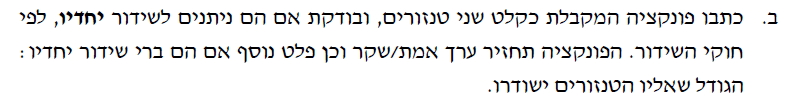


In [19]:
import numpy as np

def check_shape_compatibility_for_broadcast(left, right):
    print("Check broadcast compatibility:\nLeft shape:", left.shape , "Right shape:", right.shape, sep=" ")

    if left.ndim == 0 or right.ndim == 0:
        error = f"could not broadcast - all dimensions must be > 0"
        return False, None, error
    
    max_dim = max(left.ndim, right.ndim)
    min_dim = min(left.ndim, right.ndim)
    (min_len_tensor, max_len_tensor) = (left, right) if left.ndim == min_dim else (right, left)

    for i in range(max_dim - min_dim):
      min_len_tensor = torch.unsqueeze(min_len_tensor, 0)

    broadcasted_size = np.zeros(max_len_tensor.ndim, np.int_)
    # print("Result Shape:", broadcasted_size)

    shape1 = min_len_tensor.shape
    shape2 = max_len_tensor.shape
    # print("Adjusted shape 1:", shape1, "Adjusted shape 2:", shape2, sep=" ")

    for i, (dim1, dim2) in enumerate(zip(reversed(shape1), reversed(shape2))):
      dim_to_adjust = max_len_tensor.ndim - i - 1

      # print("Dim1:", dim1, "Dim2:", dim2, "Dimension to adjust: ", dim_to_adjust)
      if dim1 > dim2 and dim2 != 1:
        error = f"Could not broadcast - The expanded size of the tensor ({dim1}) must match the size ({dim2}) at non-singleton dimension 1. Sizes: {shape1}, {shape2}"
        return False, None, error

      if dim2 > dim1 and dim1 != 1:
        error = f"Could not broadcast - The expanded size of the tensor ({dim2}) must match the size ({dim1}) at non-singleton dimension 1. Sizes: {shape2}, {shape1}"
        return False, None, error
        
      broadcasted_size[dim_to_adjust] = max(dim1, dim2)

    return True, tuple(broadcasted_size.tolist()), "Shapes are Compatible"

## **Broadcast compatibility - Sanity check:** 


1 **. Compatible for broadcasting**



In [20]:
t5 = torch.rand(8, 2, 1)
t6 = torch.rand(5, 1, 1, 2, 7)



In [21]:
possible, res_shape, error = check_shape_compatibility_for_broadcast(t5, t6)

print(f"Can {t5.shape} be Broadcasted with {t6.shape}? ", possible, ", Result Shape: ", res_shape)

Check broadcast compatibility:
Left shape: torch.Size([8, 2, 1]) Right shape: torch.Size([5, 1, 1, 2, 7])
Can torch.Size([8, 2, 1]) be Broadcasted with torch.Size([5, 1, 1, 2, 7])?  True , Result Shape:  (5, 1, 8, 2, 7)


In [22]:
possible, res_shape, error = check_shape_compatibility_for_broadcast(t6, t5)

print("Can Be Broadcasted? ", possible, ", Result Shape: ", res_shape)

Check broadcast compatibility:
Left shape: torch.Size([5, 1, 1, 2, 7]) Right shape: torch.Size([8, 2, 1])
Can Be Broadcasted?  True , Result Shape:  (5, 1, 8, 2, 7)


2. **Incompatible for broadcasting**

In [23]:
t7 = torch.rand(8, 2, 1)
t8 = torch.rand(5, 1, 5, 2, 7)

In [24]:
torch.broadcast_tensors(t7, t8)

RuntimeError: ignored

In [25]:
possible, res_shape, error = check_shape_compatibility_for_broadcast(t7, t8)

print("Can Be Broadcasted? ", possible, ", Reason:: ", error)

Check broadcast compatibility:
Left shape: torch.Size([8, 2, 1]) Right shape: torch.Size([5, 1, 5, 2, 7])
Can Be Broadcasted?  False , Reason::  Could not broadcast - The expanded size of the tensor (8) must match the size (5) at non-singleton dimension 1. Sizes: torch.Size([1, 1, 8, 2, 1]), torch.Size([5, 1, 5, 2, 7])


## **Part C**

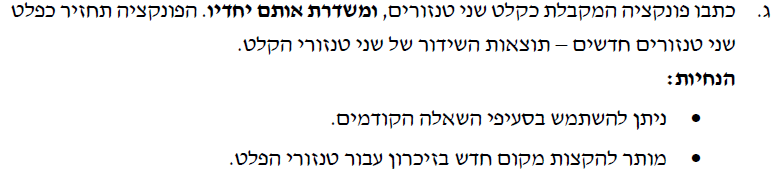

In [35]:
def my_broadcast_tensors(t1, t2):
  assert torch.is_tensor(t1), f"my_expand_as supports only tensors!"
  assert torch.is_tensor(t2), f"my_expand_as supports only tensors!"

  are_compatible, shape, error = check_shape_compatibility_for_broadcast(t1, t2)

  if not are_compatible:
    raise RuntimeError(error)

  temp = torch.ones(shape)
  print("Temp Size: ", temp.shape)

  res1 = my_expand_as(t1, temp)
  res2 = my_expand_as(t2, temp)

  return res1, res2

# **"My broadcast tensors" Sanity check:** 

In [36]:
t9 = torch.rand(3, 2, 1)
t10 = torch.rand(2, 1, 1, 2, 10)

print(t9, t10, sep = '\n\n')

tensor([[[0.8702],
         [0.0808]],

        [[0.9262],
         [0.7334]],

        [[0.7021],
         [0.9449]]])

tensor([[[[[0.5311, 0.0574, 0.9891, 0.0319, 0.2609, 0.4535, 0.7333, 0.5463,
            0.4551, 0.5540],
           [0.8174, 0.8131, 0.3119, 0.4969, 0.2925, 0.8614, 0.0533, 0.3565,
            0.5069, 0.6493]]]],



        [[[[0.0200, 0.5989, 0.1653, 0.4217, 0.5034, 0.5900, 0.8657, 0.8373,
            0.4518, 0.1693],
           [0.0344, 0.0655, 0.0370, 0.9839, 0.9754, 0.8955, 0.1582, 0.5001,
            0.1614, 0.2990]]]]])


In [37]:
res1, res2 = my_broadcast_tensors(t9, t10)

Check broadcast compatibility:
Left shape: torch.Size([3, 2, 1]) Right shape: torch.Size([2, 1, 1, 2, 10])
Temp Size:  torch.Size([2, 1, 3, 2, 10])
Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([2, 1, 3, 2, 10])
Source shape: torch.Size([2, 1, 1, 2, 10]) Target shape: torch.Size([2, 1, 3, 2, 10])


In [38]:
print(res1, res1.shape, res2, res2.shape, sep = '\n\n')

tensor([[[[[0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702,
            0.8702, 0.8702],
           [0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808,
            0.0808, 0.0808]],

          [[0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262,
            0.9262, 0.9262],
           [0.7334, 0.7334, 0.7334, 0.7334, 0.7334, 0.7334, 0.7334, 0.7334,
            0.7334, 0.7334]],

          [[0.7021, 0.7021, 0.7021, 0.7021, 0.7021, 0.7021, 0.7021, 0.7021,
            0.7021, 0.7021],
           [0.9449, 0.9449, 0.9449, 0.9449, 0.9449, 0.9449, 0.9449, 0.9449,
            0.9449, 0.9449]]]],



        [[[[0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702, 0.8702,
            0.8702, 0.8702],
           [0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808, 0.0808,
            0.0808, 0.0808]],

          [[0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262, 0.9262,
            0.9262, 0.9262],
           [0.7334, 0.7334, 0.7334, 0.7334,

## **Part D - Tests**

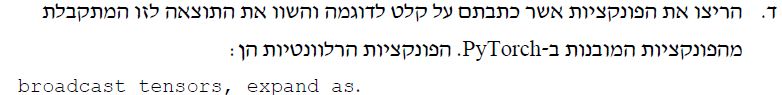



*   **Section A** was tested by calling the method "test_expand_as()" in the sections named:
    > 1. Test VALID expand as
    > 2. Test INVALID expand as

*   **Section B** was tested in the sections named:
    > Broadcast compatibility - Sanity check
      > 1. Compatible for broadcasting
      > 2. Incompatible for broadcasting








## **Test Method for Broadcasting**

In [39]:
def test_broadcats_tensors(s, t):
    res_to_test1, res_to_test2 = my_broadcast_tensors(s, t)
    res_expected1, res_expected2 = torch.broadcast_tensors(s, t)
    print(f"\n\nExpected shape #1: {res_expected1.shape}:", f"Expected Value #1:", res_expected1, sep="\n")
    print(f"\n\nExpected shape #2: {res_expected2.shape}:", f"Expected Value #2:", res_expected2, sep="\n")
    
    assert torch.all(res_expected1.eq(res_to_test1))
    assert torch.all(res_expected2.eq(res_to_test2))
    print("\nExpanded tesults are equal")

In [40]:
t11 = torch.rand(3, 2, 1)
t12 = torch.rand(2, 1, 2, 1, 2, 10)

print(t11, t12, sep = '\n\n')

tensor([[[0.9369],
         [0.1088]],

        [[0.5608],
         [0.6581]],

        [[0.1836],
         [0.8605]]])

tensor([[[[[[0.6495, 0.6444, 0.4735, 0.2540, 0.9997, 0.2285, 0.9741, 0.0188,
             0.4354, 0.3861],
            [0.7124, 0.7923, 0.2321, 0.0343, 0.6283, 0.1255, 0.3333, 0.0744,
             0.2128, 0.8072]]],


          [[[0.1286, 0.1058, 0.3902, 0.7995, 0.5589, 0.9003, 0.1182, 0.4661,
             0.8033, 0.9069],
            [0.1060, 0.1312, 0.7695, 0.0939, 0.2087, 0.8845, 0.9869, 0.9806,
             0.5929, 0.7135]]]]],




        [[[[[0.2835, 0.1937, 0.5947, 0.6964, 0.3096, 0.3965, 0.3155, 0.5211,
             0.2523, 0.8706],
            [0.3020, 0.0793, 0.8668, 0.0529, 0.9522, 0.8281, 0.0433, 0.7051,
             0.3658, 0.0694]]],


          [[[0.2935, 0.6239, 0.5654, 0.0491, 0.2900, 0.8047, 0.7962, 0.0200,
             0.0709, 0.0587],
            [0.9233, 0.6797, 0.0389, 0.5577, 0.6630, 0.4500, 0.9427, 0.4167,
             0.5763, 0.7854]]]]]])


In [41]:
res1, res2 = my_broadcast_tensors(t11, t12)

Check broadcast compatibility:
Left shape: torch.Size([3, 2, 1]) Right shape: torch.Size([2, 1, 2, 1, 2, 10])
Temp Size:  torch.Size([2, 1, 2, 3, 2, 10])
Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([2, 1, 2, 3, 2, 10])
Source shape: torch.Size([2, 1, 2, 1, 2, 10]) Target shape: torch.Size([2, 1, 2, 3, 2, 10])


In [42]:
res3, res4 = torch.broadcast_tensors(t11, t12)
print("Targer size: ", res3.shape)


Targer size:  torch.Size([2, 1, 2, 3, 2, 10])


In [43]:
test_broadcats_tensors(t11, t12)

Check broadcast compatibility:
Left shape: torch.Size([3, 2, 1]) Right shape: torch.Size([2, 1, 2, 1, 2, 10])
Temp Size:  torch.Size([2, 1, 2, 3, 2, 10])
Source shape: torch.Size([3, 2, 1]) Target shape: torch.Size([2, 1, 2, 3, 2, 10])
Source shape: torch.Size([2, 1, 2, 1, 2, 10]) Target shape: torch.Size([2, 1, 2, 3, 2, 10])


Expected shape #1: torch.Size([2, 1, 2, 3, 2, 10]):
Expected Value #1:
tensor([[[[[[0.9369, 0.9369, 0.9369, 0.9369, 0.9369, 0.9369, 0.9369, 0.9369,
             0.9369, 0.9369],
            [0.1088, 0.1088, 0.1088, 0.1088, 0.1088, 0.1088, 0.1088, 0.1088,
             0.1088, 0.1088]],

           [[0.5608, 0.5608, 0.5608, 0.5608, 0.5608, 0.5608, 0.5608, 0.5608,
             0.5608, 0.5608],
            [0.6581, 0.6581, 0.6581, 0.6581, 0.6581, 0.6581, 0.6581, 0.6581,
             0.6581, 0.6581]],

           [[0.1836, 0.1836, 0.1836, 0.1836, 0.1836, 0.1836, 0.1836, 0.1836,
             0.1836, 0.1836],
            [0.8605, 0.8605, 0.8605, 0.8605, 0.8605, 0.8605,